# Project 1

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
from statsmodels.sandbox.stats.runs import runstest_1samp

In [34]:
#(1.A)
#Linear congruential random number generator

a = 57
b = 1 
c = 256
x0 = 10                
                                               
def CongruentialRandom(a,b,c,x):
    return( (a*x+b) % c )

Period =  256


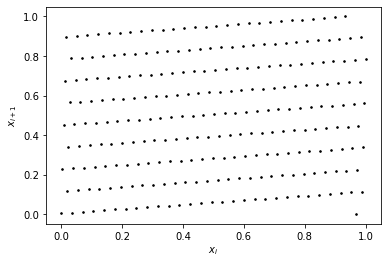

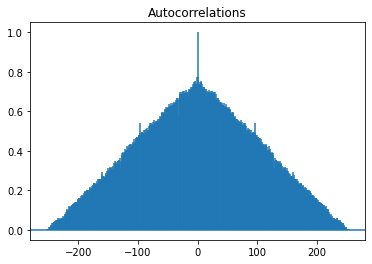

In [39]:
#(1.B)

#Function to return period and full set of sequence of datas for above random number generator with given parameter
def Generator(a,b,c,x):
    data = []
    data.append(x)
    i = 0
    period = 1
    while(i < 1):
        x =  CongruentialRandom(a,b,c,x)
        if(x == x0):
            break
        period += 1
        data.append(x)
    return(data, period)
    
data = [x/(c-1) for x in Generator(a,b,c,x0)[0]]
period = Generator(a,b,c,x0)[1]
print('Period = ',period)

#scatter plot
for i in range(len(data)):
    if(i != len(data)-1):
        plt.scatter(data[i],data[i+1], color = 'k', marker = ".", s = 10)
    if(i == len(data)-1):
        plt.scatter(data[255],data[0], color = 'k', marker = ".", s = 10)
        
plt.xlabel('$x_i$')
plt.ylabel('$x_{i+1}$')
plt.show()

#Check for autocorrilation
plt.acorr(data, maxlags = period - 1)
plt.title("Autocorrelations")
plt.show()

The plot of $x_i$ vs $x_{i+1}$ fills in the unit square with nice spacing between the lattices which is a sign of a 
nice random number generator and there seem to some corrilation in the sample which can be seen from autocorrelation 
plot but that decreases with increasing lags.

(1.C) Here the new random number generator is created just by changing parameters from above.

Period =  512
KstestResult(statistic=0.5, pvalue=6.919888756409922e-119)


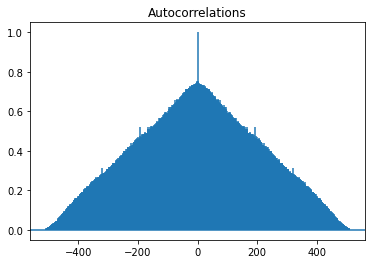

Run test statistic = (-0.2654248813639348, 0.7906821707743507)


In [40]:
a = 137
b = 1
c = 512
x0 = 23    

data = [x/(c-1) for x in Generator(a,b,c,x0)[0]]                                        

period = Generator(a,b,c,x0)[1]
print('Period = ',period)

#KS-test
print(scipy.stats.kstest(data, 'norm'))
                                            
#Check for autocorrilation
plt.acorr(data, maxlags = period - 1)
plt.title("Autocorrelations")
plt.show()

#Run Test
print('Run test statistic =',runstest_1samp(data, correction=False))

p-value of KS-test seems less than 0.05, so we conclude the distribution of our random number generator is consistent 
with the normal distribution between 0 and 1. Looking at the autocorrilations plot, they seem to somewhat normal, creating a large sample size and for larger number of lags may result in better approximation. Further a run test is also applied to the distribution. In case of gap test, if the samples were truely random, Normal distribution is expected. 

(1.D) 
Following one time pad is created in following steps.
First functions to convert a given text to binary strings is defined. Here functions DecibalToBinary(x) and TextToBinary(string) achives the goal.

In [41]:
#Function to convert integers to 8-bit binary numbers. 
def DecibalToBinary(x):
    binary = bin(x).replace('0b','')
    a = binary[::-1] 
    while len(a) < 8:
        a += '0'
    binary = a[::-1]
    return(binary)

#Function to convert text to a sequence of bianry digits
def TextToBinary(string):
    binary = []
    for t in string:
        b = str(DecibalToBinary(ord(t)))
        for d in b:
            binary.append(d)
    return(binary)

Then a random key is generated, which is done in following way. At first arbiterary paramaters 
a, b and c were choosen for Linear congruential random number generator as before. The initial seed(x0) is taken 
from the user in a sense that knowing the seed allows to reconstruct the key. Then knowing all the parameters 
(a,b,c,x0), CongruentialRandom function is called iteratively and a 42nd(completely arbiterarly) number in the 
sequence is choosen as the key. Then its converted to 8-bit binary and is made of same number of digit as the 
binary coding of the text by making copies of itself. Here function Key() generates a key provided with the 
binary sequence of data as input and user input seed.

In [42]:
#Generation of a random, secret key.
def Key(BinaryText):
    length = len(BinaryText)
    a = 34
    b = 5 
    c = 512
    x0 = int(input("Enter a seed : "))
    i = 0
    while(i < 42):
        d = CongruentialRandom(a,b,c,x0)
        i += 1
    key = DecibalToBinary(d)
    BinaryKey = []
    i = 0
    while(i < length/8):
        for t in str(key):
            BinaryKey.append(t)
        i += 1   
    return(BinaryKey)

Now we are ready to encode the message in binary strings. Which is done by EncodeText() function. EncodeText() can 
also take input from file(simply by taking out the comment and commenting out the argument 'Text' from the 
defination, Here for demonestration, its choosen to provide input manually). Then the function will return the 
encoded text and also write encoded text in a file.

In [43]:
#Function to encode the text and write in a file
def EncodeText(
        #filename,
        Text):
    """
    with open(filename, 'r') as file:
        Text = file.read().replace('\n', '')
    """
    BinaryText = TextToBinary(Text)
    key = Key(TextToBinary(Text))
    print("Encrypting message...")
    length = len(BinaryText)
    i = 0
    EncodedText = []
    file = open("Encoded_Text.txt", "w")
    for i in range(length):
        EncodedText.append( str(int(BinaryText[i])^int(key[i])) )
        file.write(EncodedText[i])
    file.close()
    print("Encrypted")
    return(EncodedText)

Finally, to decode the information, Following two functions are used. First BinartToTex() converts a sequence of 
binary strings to a unicode character. DecodeText() function decodes the given sequence either as a binary code 
or also from a file(for same above reasons) and returns the decoded data simultaneously writing in a file. 

In [44]:
#Function to convert 8 bits binary to unicode character
def BinaryToText(Text):
    b =''.join([str(item) for item in Text])
    text = ''.join(chr(int(b[i:i+8], 2)) for i in range(0, len(b), 8))
    return(text)

def DecodeText(BinaryText
               #,filename
               ):
    """
    with open(filename, 'r') as file:
        BinaryText = file.read().replace('\n', '')
    """
    key = Key(BinaryText)
    print("Decrypting message...")
    length = len(BinaryText)
    DecodedTextBinary = []
    file = open("Decoded_Text.txt", "w")
    for i in range(length):
        DecodedTextBinary.append( str(int(BinaryText[i])^int(key[i])) )
    DecodedTextUnicode = BinaryToText(DecodedTextBinary)
    length = len(DecodedTextUnicode)
    for i in range(length):
        file.write(DecodedTextUnicode[i])
    file.close()
    print("Decrypted")
    return(DecodedTextUnicode)

For a demonenstration, we'll encode the following paragraph. It has to be noted that the program will ask for a seed 
in both encription and decreption process. For a encrypted data, knowing the right seed only give a meaningful 
output, otherwise the execution is still possible, but the output maynot make sense.

In [45]:
test_string = "Provide your random number generator (which needs to generate binary numbers) along with the seed as a piece of code, allowing to reconstruct the key required for encoding."
Binary_test_string = EncodeText(test_string)
print(DecodeText(Binary_test_string))

Enter a seed : 32
Encrypting message...
Encrypted
Enter a seed : 32
Decrypting message...
Decrypted
Provide your random number generator (which needs to generate binary numbers) along with the seed as a piece of code, allowing to reconstruct the key required for encoding.


#(2.A) 

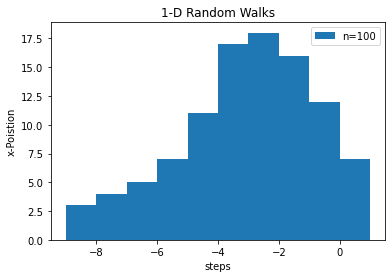

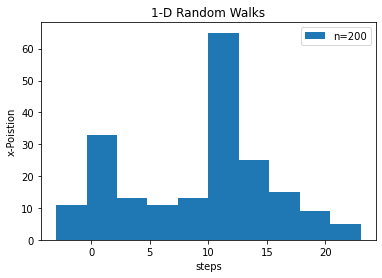

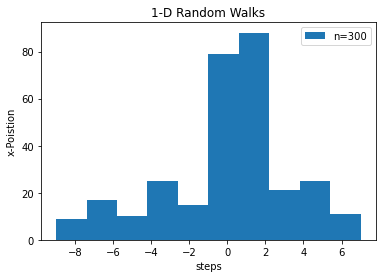

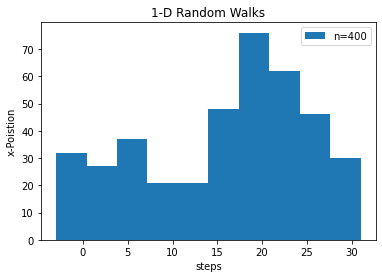

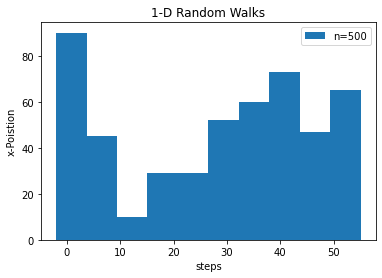

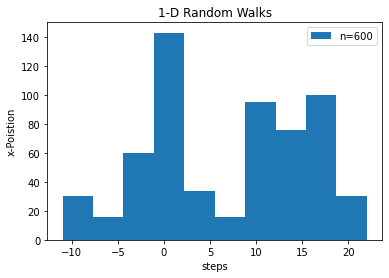

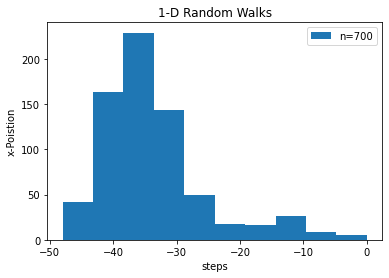

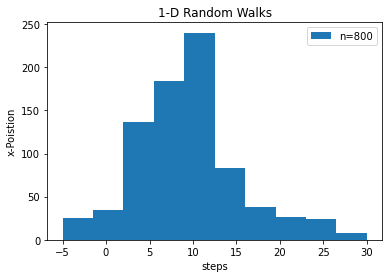

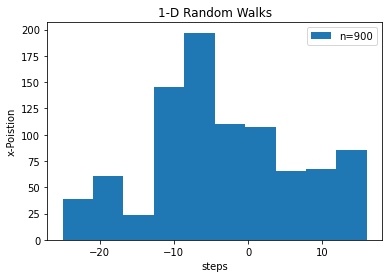

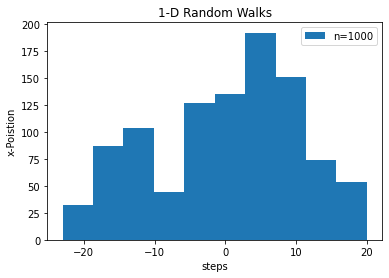

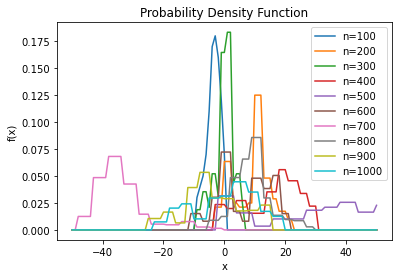

In [46]:
def RandomWalk(n):
    xPosition = [0]
    x = 0
    for i in range(n-1):
        x += 1 if np.random.choice([0, 1], p=[.5, .5]) >= 1 else -1
        xPosition.append(x)
    return(xPosition)

n = np.arange(100,1100,100)
Randomwalk = []
steps = []

for i in range(len(n)):
    Randomwalk.append(RandomWalk(n[i])) 
    steps.append( np.arange(1,n[i]+1,1) )
    

for i in range(len(n)):
    plt.hist(Randomwalk[i],label='n={:.0f}'.format(n[i]))
    plt.title("1-D Random Walks")
    plt.xlabel("steps")
    plt.ylabel("x-Poistion")
    plt.legend()
    plt.show()

X = np.arange(-50, 51, 1)
hist = []
hist_dist = []
for i in range(len(n)):
    hist.append(np.histogram(Randomwalk[i]))
    hist_dist.append(scipy.stats.rv_histogram(hist[i]))

for i in range(len(n)):
    plt.plot(X, hist_dist[i].pdf(X), label='n={:.0f}'.format(n[i]))
    plt.title("Probability Density Function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
plt.legend()
plt.show()                                                 

Histograms of most of the graphs seems to be centered around 0, which is expected. However when a walker gets too far
from 0, it'll be unlikely to return to the 0, so wee see some pickes far from the centre in some graphs.

#(2.B)

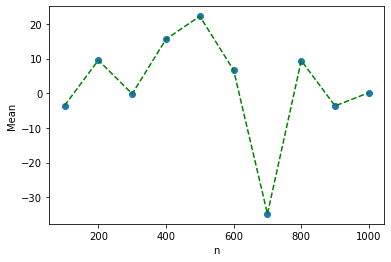

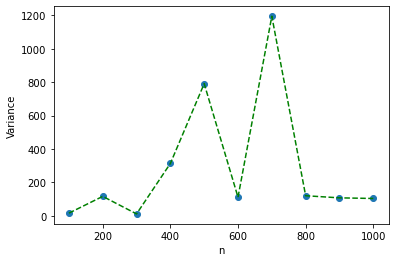

In [47]:
#Finding mean and variance
mean = []
variance = []
for i in range(len(n)):
    a = 0
    b = 0
    for j in range(len(hist_dist[i].pdf(X))):
        a += X[j]*hist_dist[i].pdf(X)[j]
        b += X[j]**2*hist_dist[i].pdf(X)[j] - (X[j]*hist_dist[i].pdf(X)[j])**2
    mean.append(a)
    variance.append(b)

plt.scatter(n,mean)
plt.plot(n,mean,'g--')
plt.xlabel('n')
plt.ylabel('Mean')
plt.show()
plt.scatter(n,variance)
plt.plot(n,variance, 'g--')
plt.xlabel('n')
plt.ylabel('Variance')
plt.show()

For all n's mean seems to be around 0, which is expected. However variance seems to also follow the expected linearly 
increasing pattern but with greater fluctuations.

#(2.C)

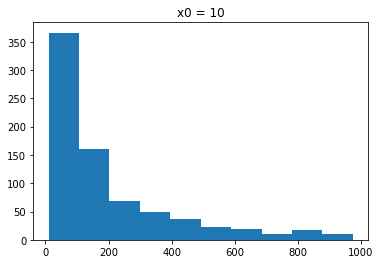

(array([  3.,  19.,  38.,  42.,  88., 121., 119., 140., 104.,  88.]),
 array([0.83403245, 0.94351158, 1.05299071, 1.16246984, 1.27194897,
        1.3814281 , 1.49090724, 1.60038637, 1.7098655 , 1.81934463,
        1.92882376]),
 <BarContainer object of 10 artists>)

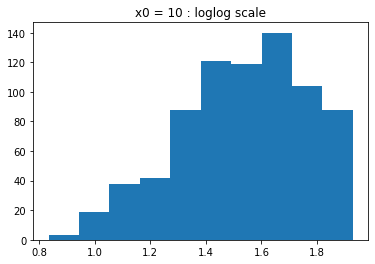

In [48]:
def RandomWalk(x0):
    xPosition = [0]
    x = 0
    n = 0
    while(x != x0):
        x += 1 if np.random.choice([0, 1], p=[.5, .5]) >= 1 else -1
        xPosition.append(x)
        n += 1
        if(n == 1000):
            break;
    return(n)

n = []
for i in range(1000):
    steps = RandomWalk(10)
    if(steps < 1000):
        n.append(steps)
plt.hist(n)
plt.title('x0 = 10')
plt.show()

loglogn = [np.log( np.log(x)) for x in n]
plt.title('x0 = 10 : loglog scale')
plt.hist(loglogn)

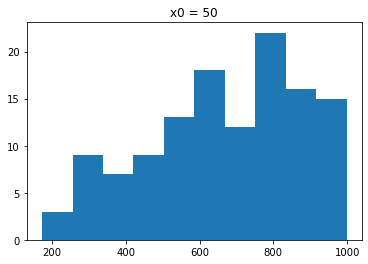

(array([ 2.,  1.,  2.,  6.,  5.,  9., 10., 25., 29., 35.]),
 array([1.64075348, 1.66991362, 1.69907376, 1.7282339 , 1.75739404,
        1.78655418, 1.81571432, 1.84487445, 1.87403459, 1.90319473,
        1.93235487]),
 <BarContainer object of 10 artists>)

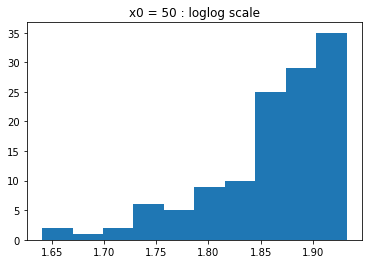

In [50]:
n = []
for i in range(1000):
    steps = RandomWalk(50)
    if(steps < 1000):
        n.append(steps)
plt.hist(n)
plt.title('x0 = 50')
plt.show()

loglogn = [np.log( np.log(x)) for x in n]
plt.title('x0 = 50 : loglog scale')
plt.hist(loglogn)

Looking at the graphs of x0 = 10, it can be concluded that most number of walkers reach x = 10 in less than 200 steps 
and the number of walkers reaching to x0 after decreases exponentially. The overall nature of tge graph seems to be 
exponentially decaying which makes sense as all the walkers have equal probability of moving front and back, so they 
tend to stay around the mean and those who have gone too far in negative direction are less likely to get to 10. 
Setting the barrier higher implies less walkers reaching it and also more number of walks, which can be seen from 
the graph with x0 = 50. 